In [19]:
import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from collections import Counter

In [14]:
# Load the CSV file with the messages
file_path = 'Channels/Ocean Protocol - GET STARTED - ask-the-ai [1082698926865522808]_data.csv'
df = pd.read_csv(file_path)

# Handle missing values in the 'Content' column
df['Content'].fillna('', inplace=True)

# Function to determine if a sentence is a question
def is_question(sentence):
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    
    # Check if pos_tags is not empty before accessing elements
    if pos_tags and len(pos_tags) > 0:
        # Check if the sentence starts with a wh-word (what, where, when, etc.) or contains a question mark
        return pos_tags[0][1] == 'WRB' or '?' in words
    
    # Return False if pos_tags is empty
    return False

# Apply the function to identify questions in the dataset
df['IsQuestion'] = df['Content'].apply(lambda x: is_question(str(x)))

# Keep only the rows that are questions
questions_df = df[df['IsQuestion']]

# Define custom topic words and categorize them
topics = {
    'Technical': ['data', 'protocol', 'access', 'metadata', 'tokens', 'asset', 'token', 'code', 'used', 'address', 'provider', 'assets'],
    'Price-Related': ['marketplace', 'price', 'market', 'fees', 'fee'],
    'General Information': ['information']
}

# Create a new column to store the detected topics for each row
questions_df['DetectedTopics'] = questions_df['Content'].apply(lambda x: [topic for topic, words in topics.items() if any(word in x.lower() for word in words)])

# Flatten the list of detected topics and fill missing values with 'N/A'
questions_df['DetectedTopics'] = questions_df['DetectedTopics'].apply(lambda x: ', '.join(x) if x else 'General Information')

# Save the updated DataFrame with only questions to a new CSV file
output_file_path = 'questions_only.csv'
questions_df.to_csv(output_file_path, index=False)

/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_72775/1159397882.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_df['DetectedTopics'] = questions_df['Content'].apply(lambda x: [topic for topic, words in topics.items() if any(word in x.lower() for word in words)])
/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_72775/1159397882.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_df['DetectedTopics'] = questions_df['DetectedTopics'].apply(lambda x: ', '.join(x) 

ocean          176
oceangpt       171
data            93
protocol        61
marketplace     35
summary         26
provide         26
token           25
access          25
use             22
information     22
code            21
sorry           21
details         21
tokens          20
does            18
like            16
market          14
create          14
used            13
dtype: int64


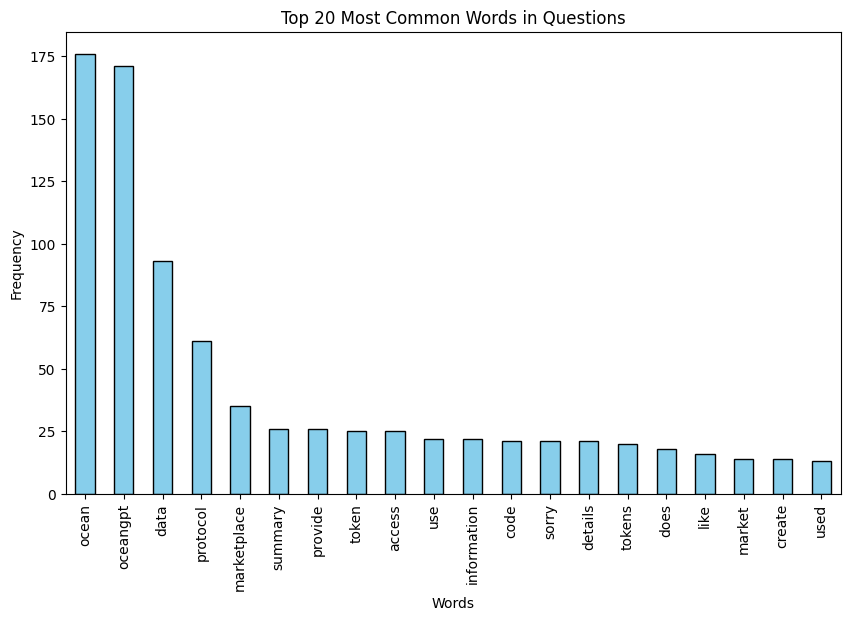

In [15]:
# Load the CSV file with the messages
file_path = 'questions_only.csv'
df = pd.read_csv(file_path)

# Handle missing values in the 'Content' column
df['Content'].fillna('', inplace=True)

# Function to extract the most common words
def get_most_common_words(data, top_n=20):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(data)
    word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    most_common_words = word_freq.sum().sort_values(ascending=False).head(top_n)
    return most_common_words

# Define a list of common question words
question_words = ['what', 'where', 'when', 'why', 'who', 'which', 'how']

# Filter out rows with questions
questions_df = df[df['Content'].apply(lambda x: any(word in x.lower() for word in question_words) or '?' in x)]

# Get the 10 most common words in questions
most_common_words_questions = get_most_common_words(questions_df['Content'], top_n=20)
print(most_common_words_questions)
# Plot the results
plt.figure(figsize=(10, 6))
most_common_words_questions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Most Common Words in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

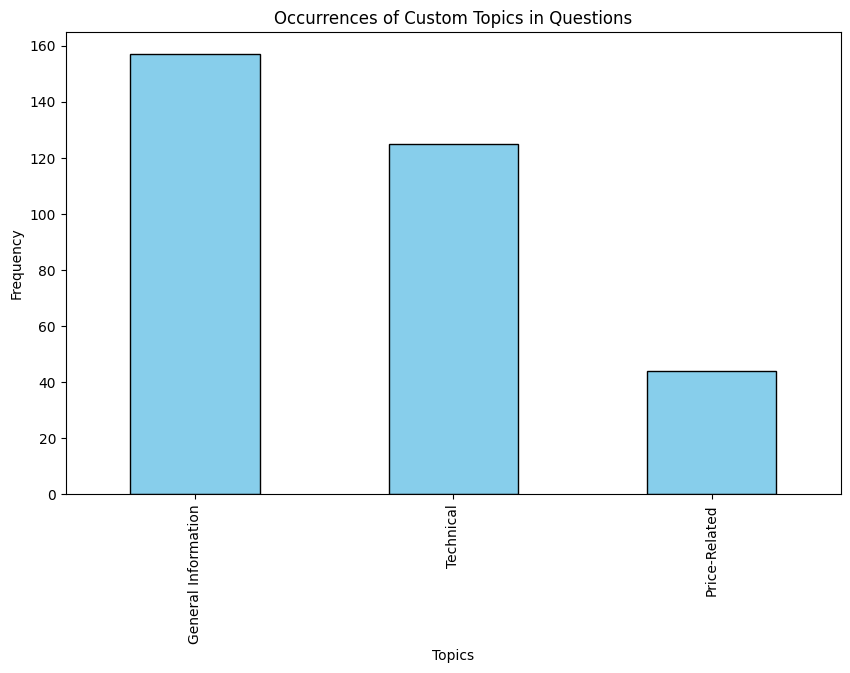

In [16]:
# Plot the results
plt.figure(figsize=(10, 6))
questions_df['DetectedTopics'].str.split(', ', expand=True).stack().value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Occurrences of Custom Topics in Questions')
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.show()


oceangpt      54
ocean         50
protocol      28
data          24
code          14
tokens        13
want           9
token          9
use            9
access         8
datatokens     7
used           6
user           6
component      6
create         6
datanft        5
datatoken      5
possible       5
does           5
set            5
dtype: int64


/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_72775/2942194072.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  technical_df['Content'].fillna('', inplace=True)


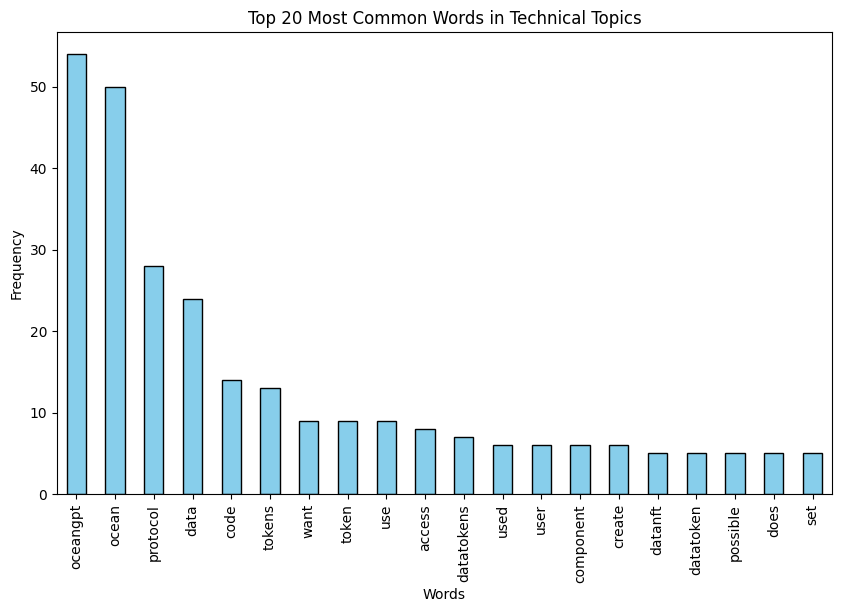

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Load the CSV file with the messages
file_path = 'questions_only.csv'
df = pd.read_csv(file_path)

# Filter rows where the topic is Technical
technical_df = df[df['DetectedTopics'] == 'Technical']

# Handle missing values in the 'Content' column
technical_df['Content'].fillna('', inplace=True)

# Function to extract the most common words
def get_most_common_words(data, top_n=20):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(data)
    word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    most_common_words = word_freq.sum().sort_values(ascending=False).head(top_n)
    return most_common_words

# Get the 20 most common words in technical messages
most_common_words_technical = get_most_common_words(technical_df['Content'], top_n=20)
print(most_common_words_technical)

# Plot the results
plt.figure(figsize=(10, 6))
most_common_words_technical.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Most Common Words in Technical Topics')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_72775/4029241581.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  technical_df['Content'].fillna('', inplace=True)


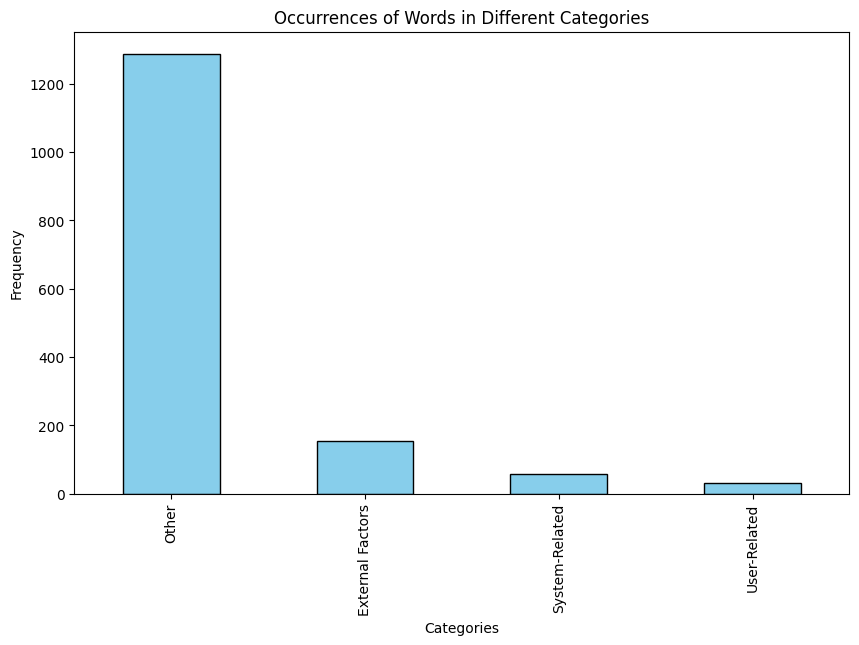

In [28]:
# Filter rows where the topic is Technical
technical_df = df[df['DetectedTopics'] == 'Technical']

# Handle missing values in the 'Content' column
technical_df['Content'].fillna('', inplace=True)

# Function to categorize words into topics
def categorize_words(word):
    user_related_keywords = ['user', 'use', 'want', 'access']
    system_related_keywords = ['protocol', 'code', 'component', 'create', 'possible']
    external_factors_keywords = ['ocean', 'oceangpt', 'tokens', 'token', 'datatokens', 'datanft', 'datatoken', 'possible', 'does', 'set']

    if word in user_related_keywords:
        return 'User-Related'
    elif word in system_related_keywords:
        return 'System-Related'
    elif word in external_factors_keywords:
        return 'External Factors'
    else:
        return 'Other'

# Tokenize and categorize words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(technical_df['Content'])
feature_names = vectorizer.get_feature_names_out()

word_categories = [categorize_words(word) for word in feature_names]

# Create a DataFrame with words and their categories
word_category_df = pd.DataFrame({'Word': feature_names, 'Category': word_categories})
word_category_df['Count'] = X.sum(axis=0).tolist()[0]

# Group by category and sum the counts
category_counts = word_category_df.groupby('Category')['Count'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
category_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Occurrences of Words in Different Categories')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()